In [109]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [118]:
template = cv2.imread('../Code/t1.png', 0)

In [119]:
#TODO - rotate image 
c,template = cv2.threshold(template, 1, 255, cv2.THRESH_BINARY )
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
template = cv2.erode(template, element)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
template = cv2.erode(template, element)
template

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0, 255,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0],
       [  0,   0, 255, 255,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0]], dtype=uint8)

array([  0, 255], dtype=uint8)

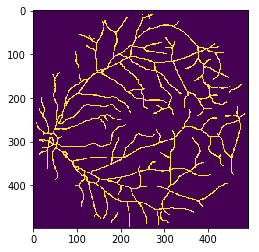

In [120]:
img = cv2.imread('../Code/skell.png', 0)
x,img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY )
img2 = img.copy()
plt.imshow(img)
np.unique(img)

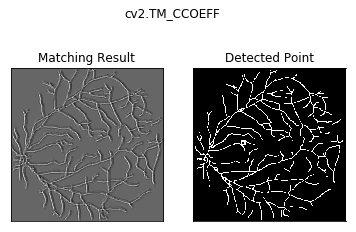

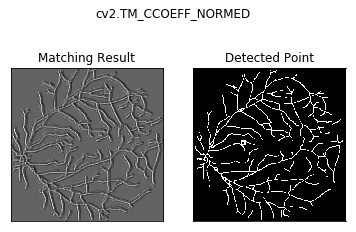

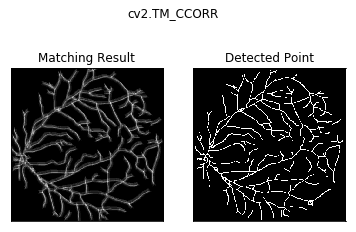

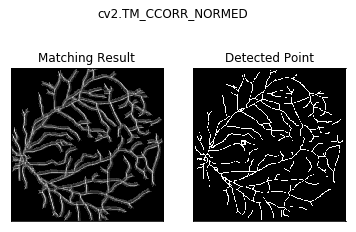

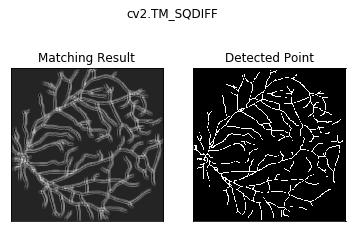

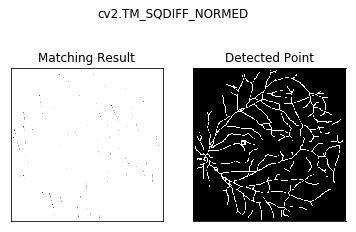

In [123]:
w, h = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
# plt.show(img)



(258, 11) 270 23


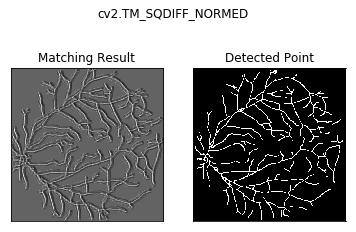

(151, 21) 163 33


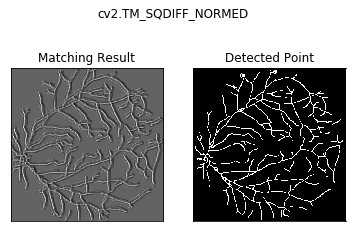

(151, 22) 163 34


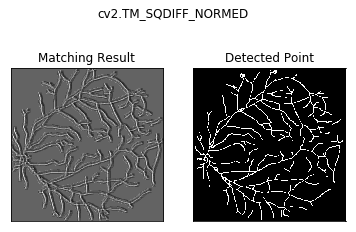

(152, 24) 164 36


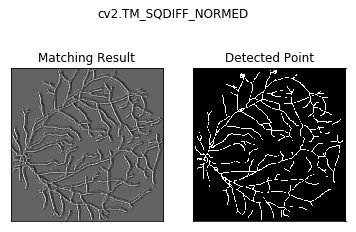

(181, 46) 193 58


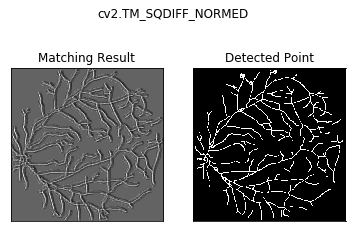

(182, 46) 194 58


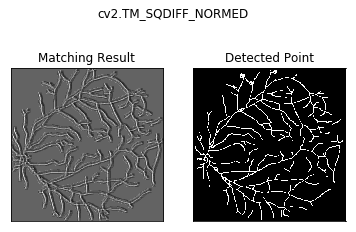

(182, 47) 194 59


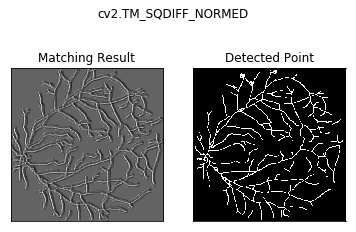

(248, 82) 260 94


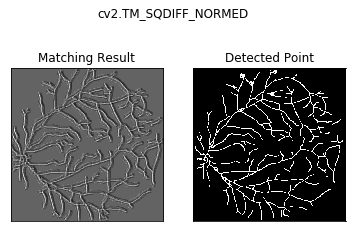

(310, 82) 322 94


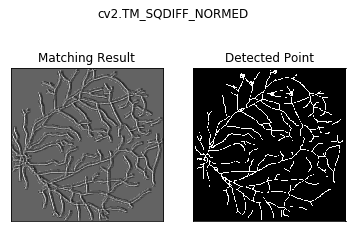

(88, 87) 100 99


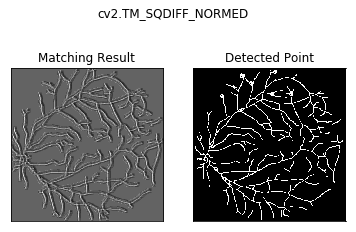

(89, 88) 101 100


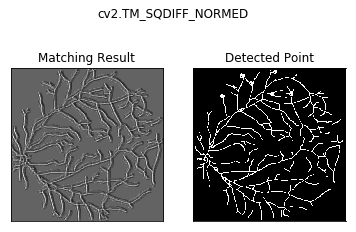

(89, 89) 101 101


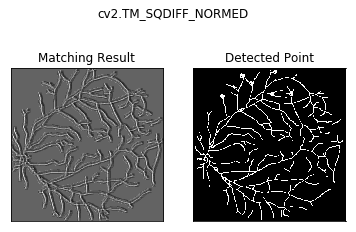

(89, 90) 101 102


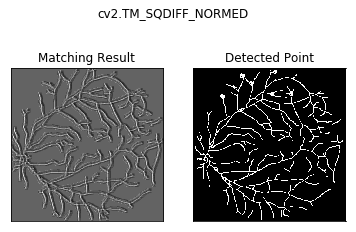

(135, 101) 147 113


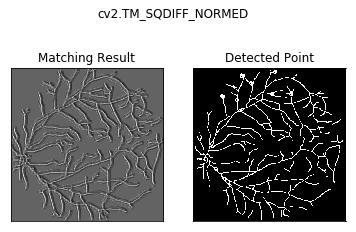

(135, 102) 147 114


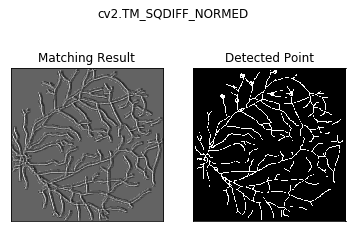

(91, 110) 103 122


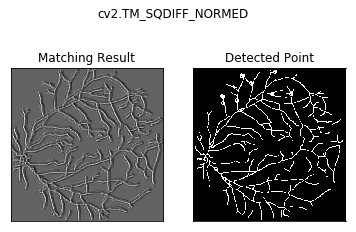

(313, 114) 325 126


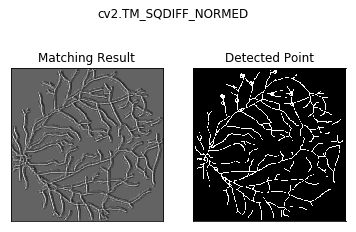

(316, 121) 328 133


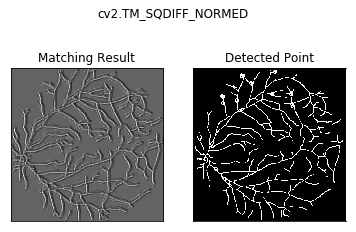

(316, 122) 328 134


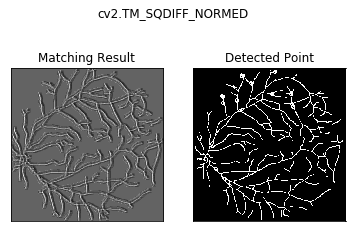

(136, 128) 148 140


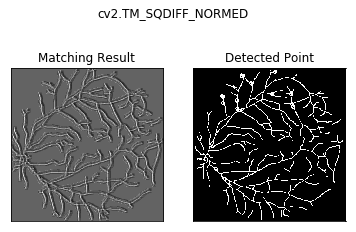

(321, 134) 333 146


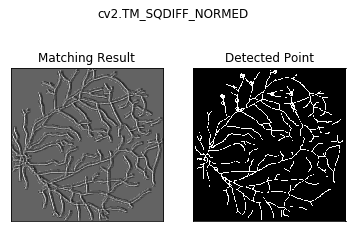

(97, 138) 109 150


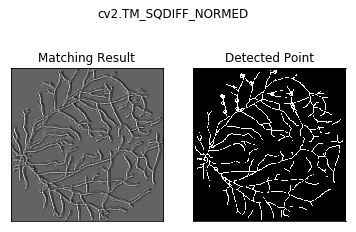

(97, 139) 109 151


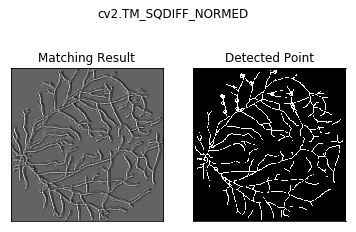

(97, 140) 109 152


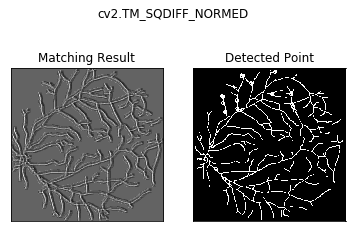

(39, 142) 51 154


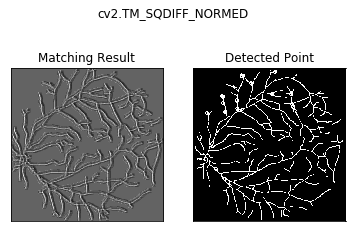

(39, 143) 51 155


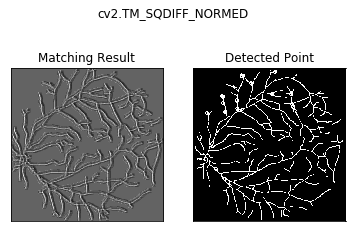

(98, 143) 110 155


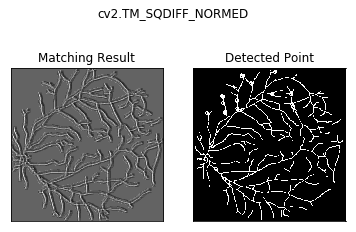

(39, 144) 51 156


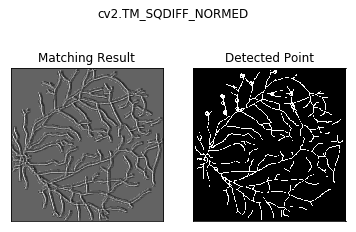

(98, 144) 110 156


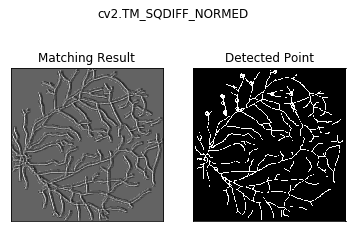

(98, 145) 110 157


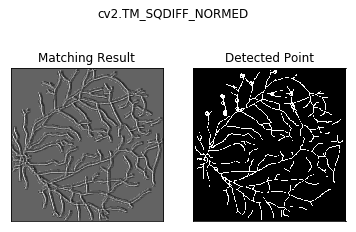

(42, 158) 54 170


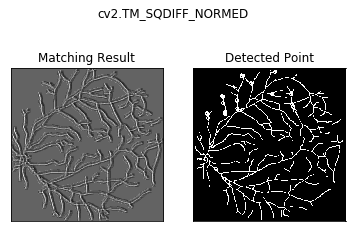

(239, 166) 251 178


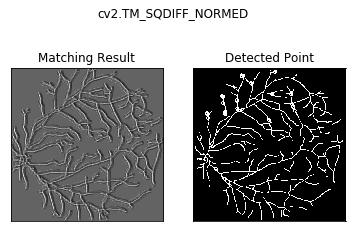

(39, 188) 51 200


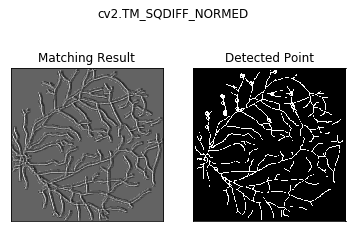

(39, 189) 51 201


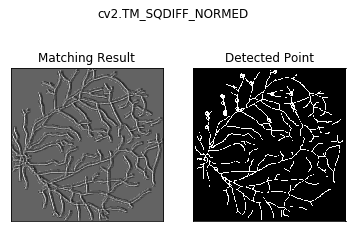

(40, 192) 52 204


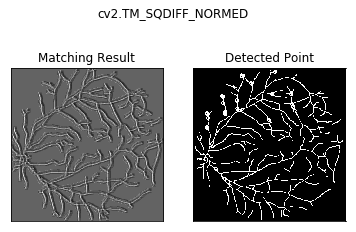

(11, 200) 23 212


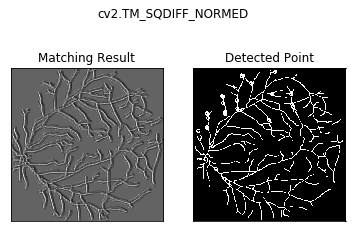

(11, 201) 23 213


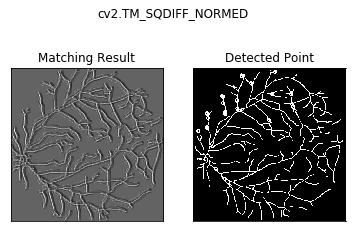

(43, 201) 55 213


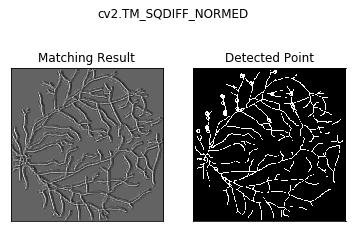

(12, 202) 24 214


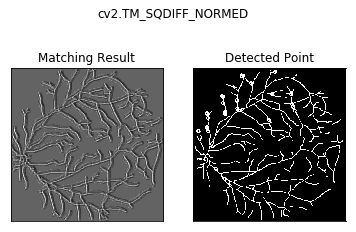

(12, 203) 24 215


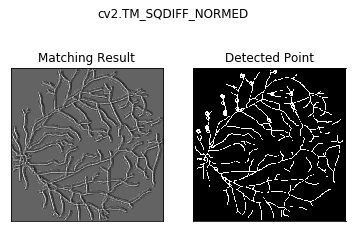

(245, 211) 257 223


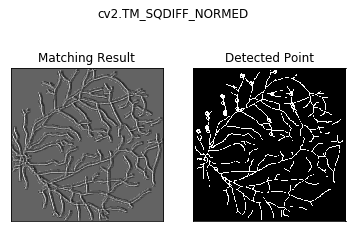

(7, 220) 19 232


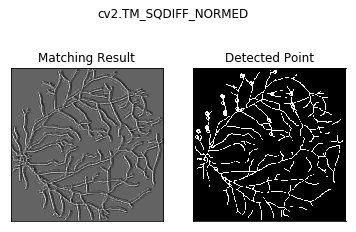

(7, 221) 19 233


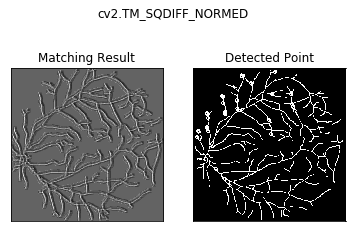

(7, 222) 19 234


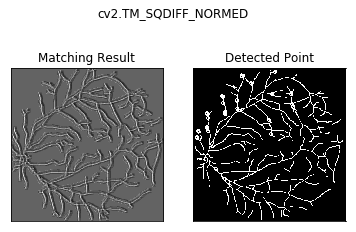

(350, 224) 362 236


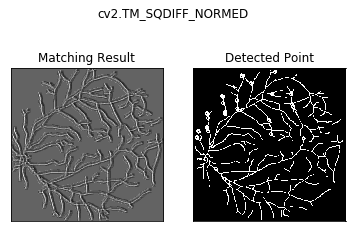

(350, 225) 362 237


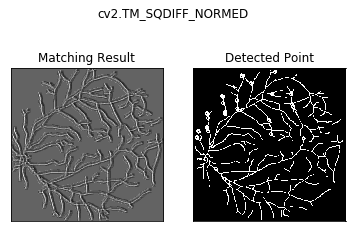

(458, 227) 470 239


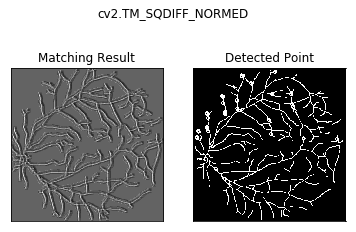

(458, 228) 470 240


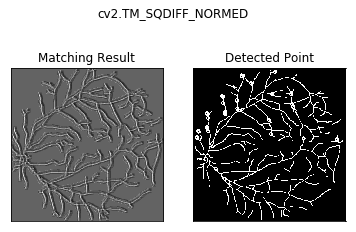

(157, 237) 169 249


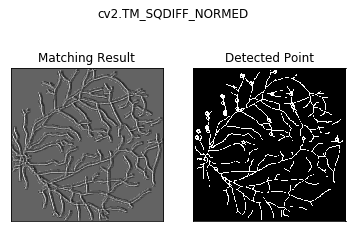

(157, 238) 169 250


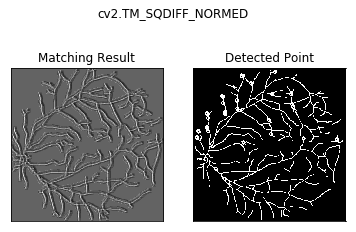

(158, 238) 170 250


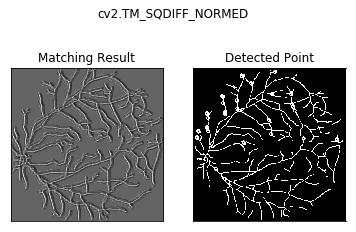

(464, 249) 476 261


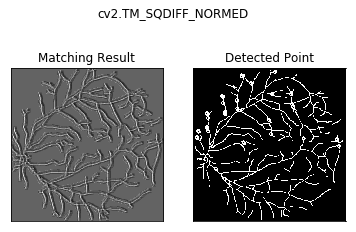

(0, 251) 12 263


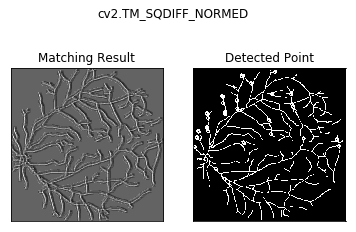

(0, 252) 12 264


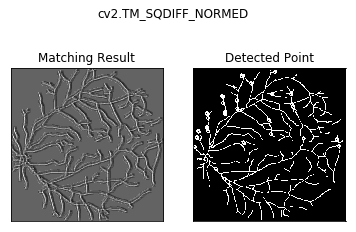

(0, 253) 12 265


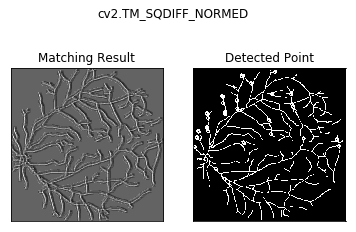

(1, 253) 13 265


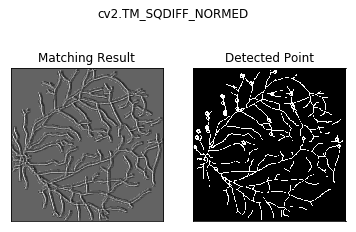

(1, 254) 13 266


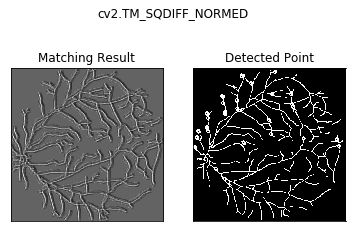

(1, 255) 13 267


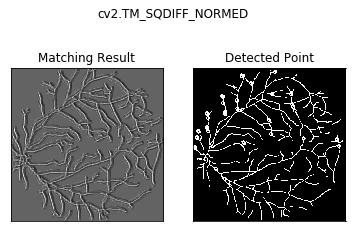

(465, 255) 477 267


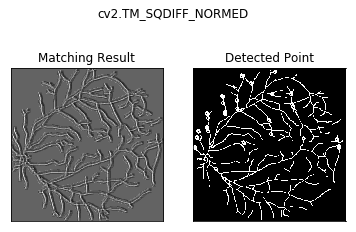

(26, 258) 38 270


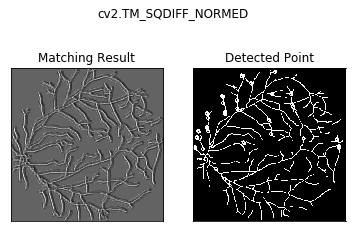

(274, 268) 286 280


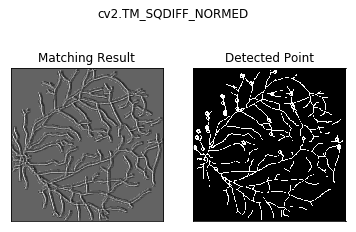

(275, 268) 287 280


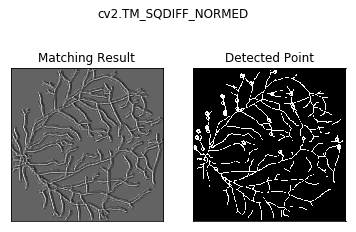

(275, 269) 287 281


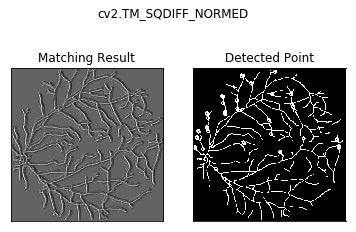

(425, 298) 437 310


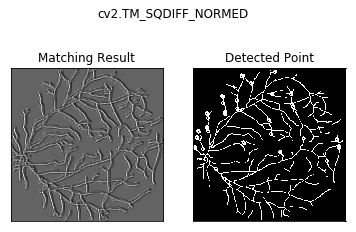

(425, 299) 437 311


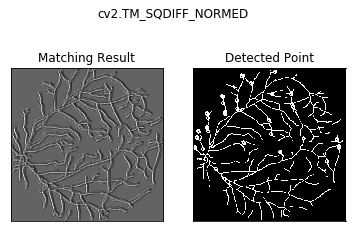

(427, 307) 439 319


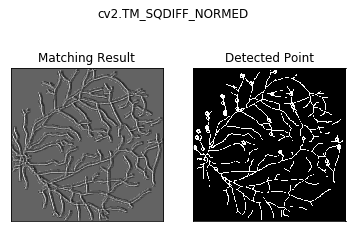

(393, 308) 405 320


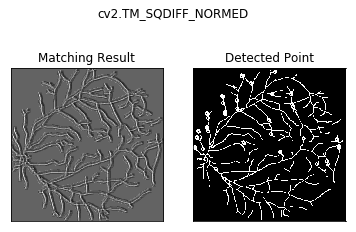

(427, 308) 439 320


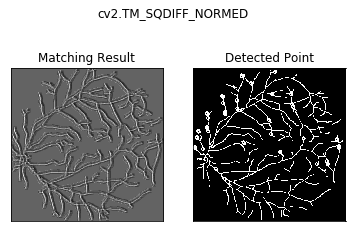

(393, 309) 405 321


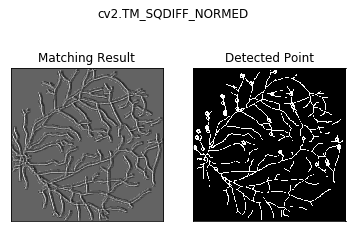

(427, 309) 439 321


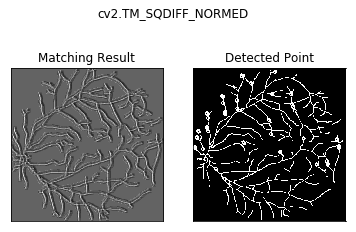

(393, 310) 405 322


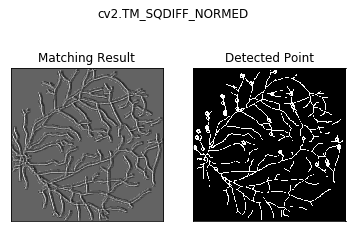

(428, 312) 440 324


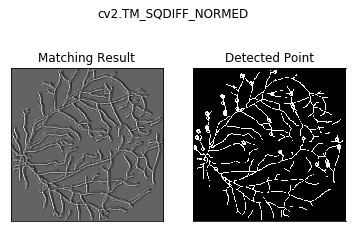

(417, 330) 429 342


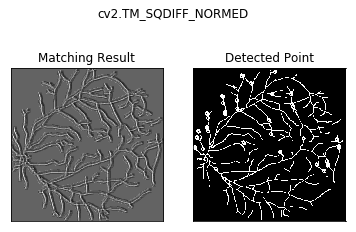

(418, 330) 430 342


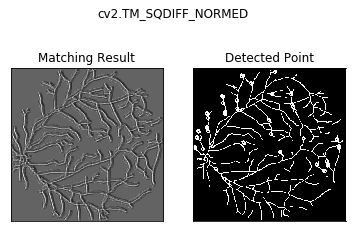

(417, 331) 429 343


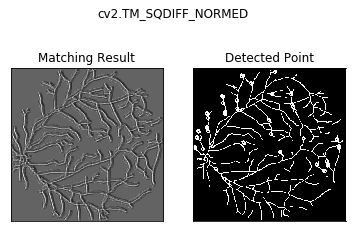

(418, 331) 430 343


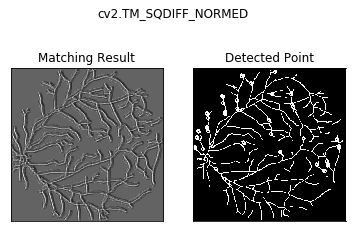

(38, 338) 50 350


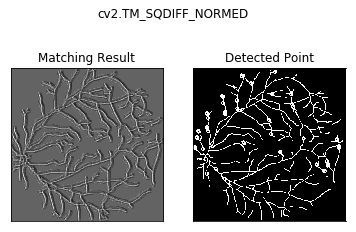

(38, 339) 50 351


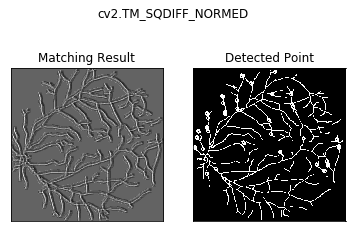

(420, 341) 432 353


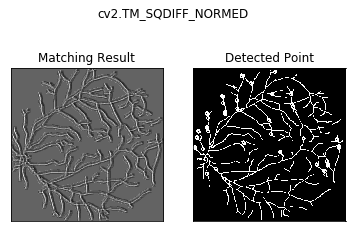

(39, 342) 51 354


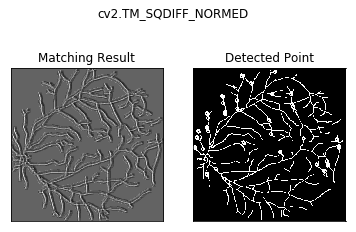

(84, 342) 96 354


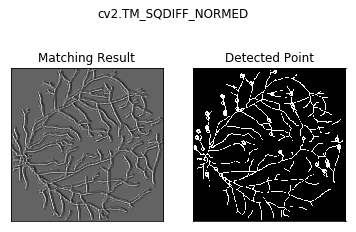

(420, 342) 432 354


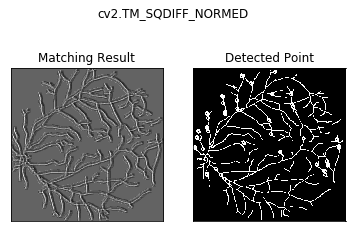

(39, 343) 51 355


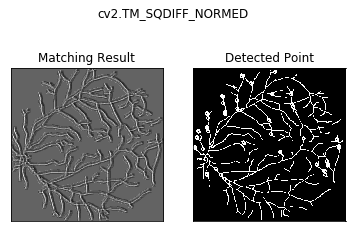

(39, 344) 51 356


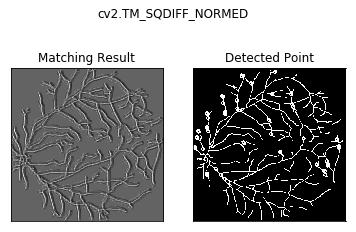

(43, 355) 55 367


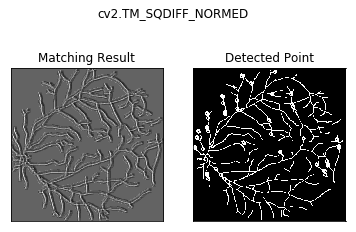

(43, 356) 55 368


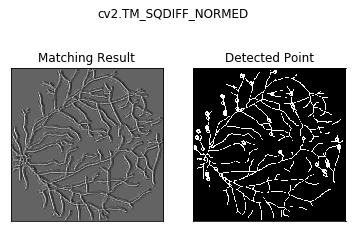

(446, 362) 458 374


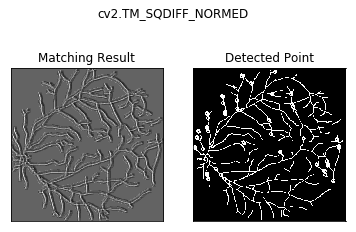

(446, 363) 458 375


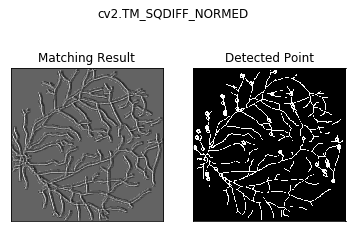

(305, 371) 317 383


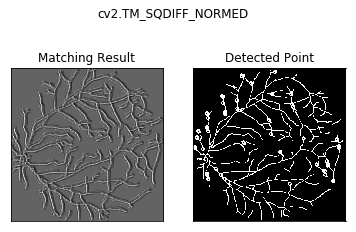

(305, 372) 317 384


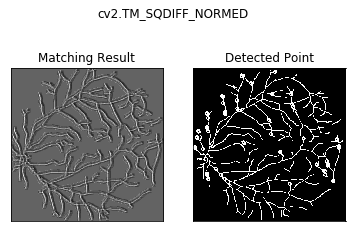

(305, 373) 317 385


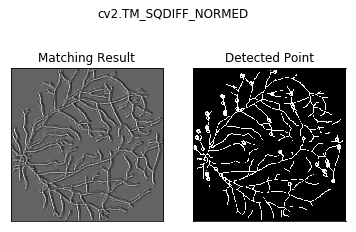

(99, 396) 111 408


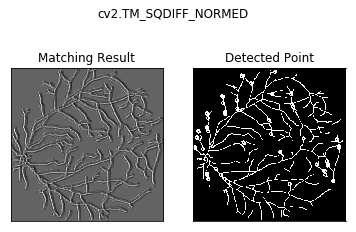

(99, 397) 111 409


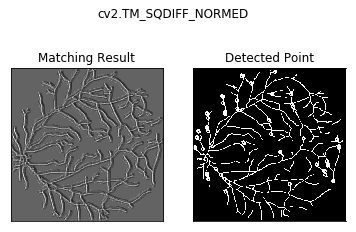

(120, 398) 132 410


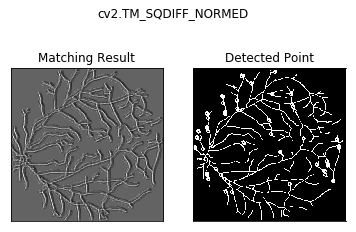

(120, 399) 132 411


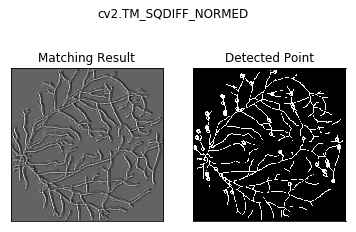

(121, 400) 133 412


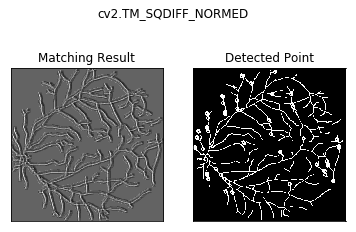

(122, 405) 134 417


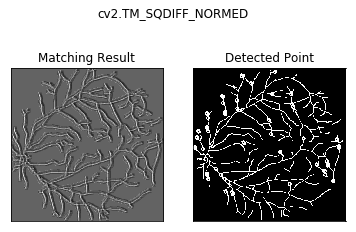

(218, 410) 230 422


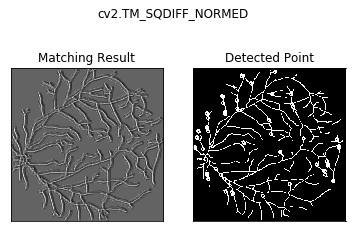

(156, 416) 168 428


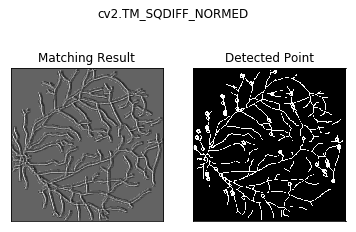

(156, 417) 168 429


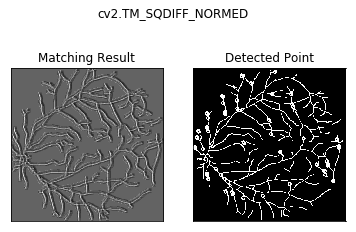

(126, 419) 138 431


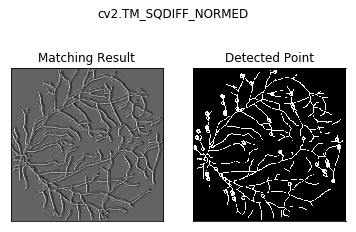

(126, 420) 138 432


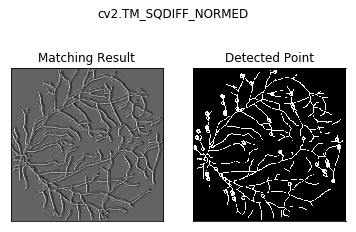

(126, 421) 138 433


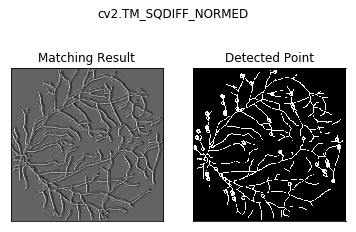

(158, 421) 170 433


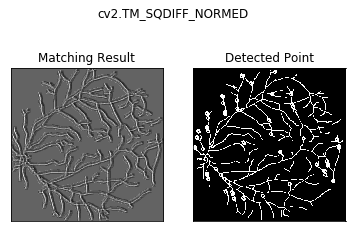

(372, 431) 384 443


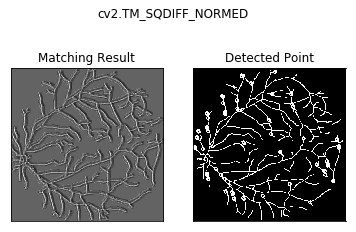

(371, 432) 383 444


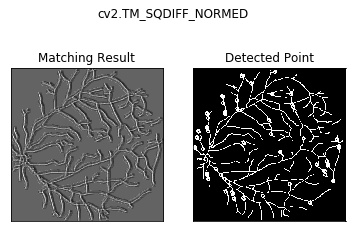

(372, 432) 384 444


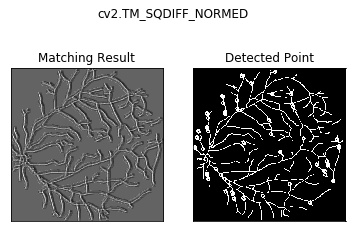

(373, 432) 385 444


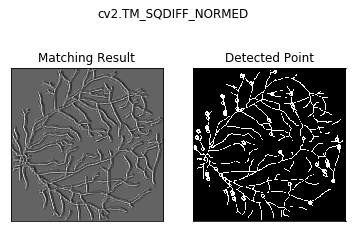

(130, 433) 142 445


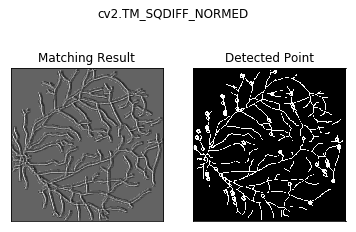

(372, 433) 384 445


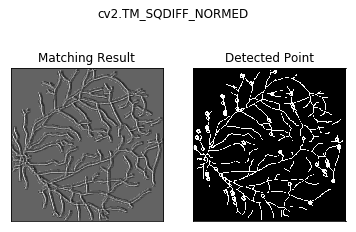

(130, 434) 142 446


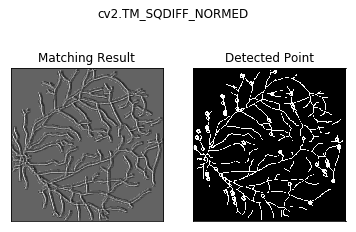

(287, 438) 299 450


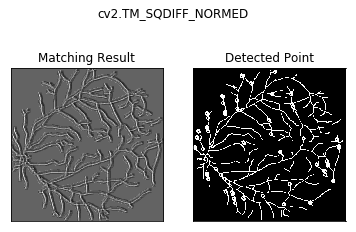

(287, 439) 299 451


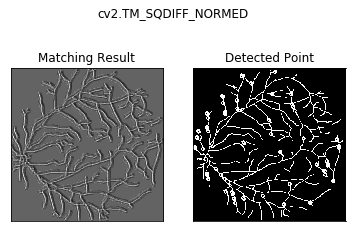

(287, 440) 299 452


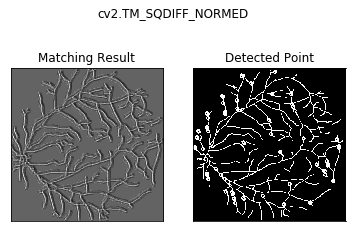

(132, 441) 144 453


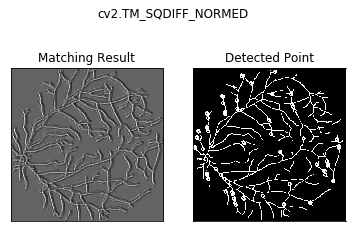

(208, 441) 220 453


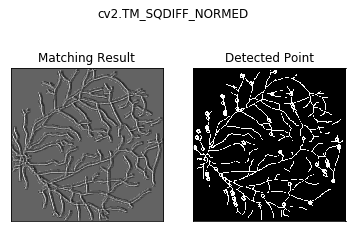

(132, 442) 144 454


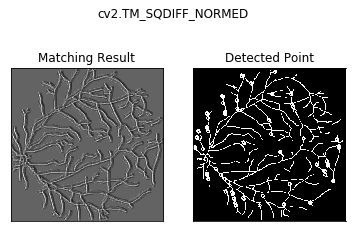

(208, 442) 220 454


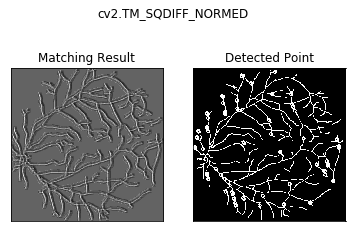

(132, 443) 144 455


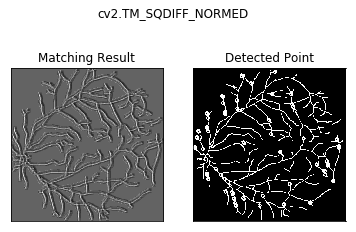

(135, 452) 147 464


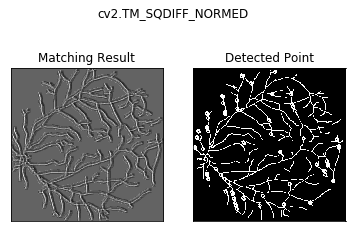

(135, 453) 147 465


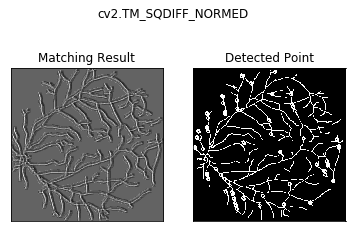

(211, 455) 223 467


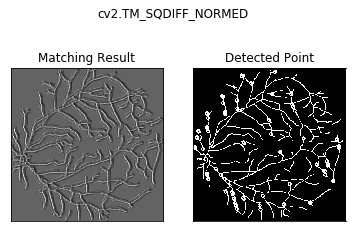

(211, 456) 223 468


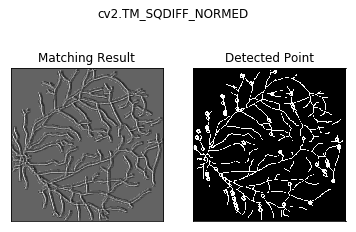

(277, 461) 289 473


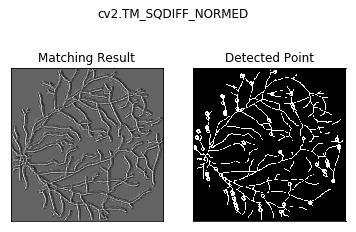

(277, 462) 289 474


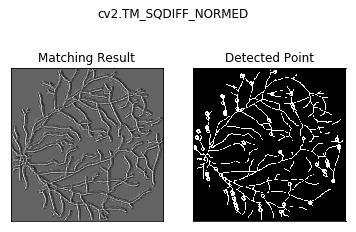

(249, 463) 261 475


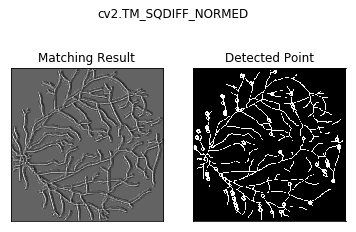

(251, 468) 263 480


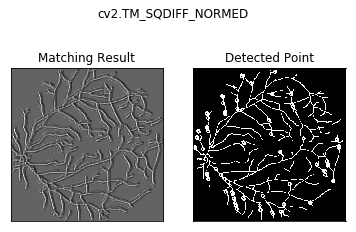

(251, 469) 263 481


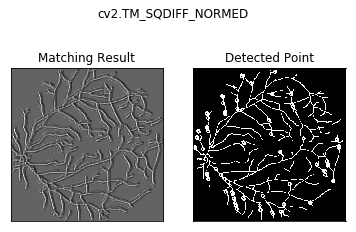

(212, 471) 224 483


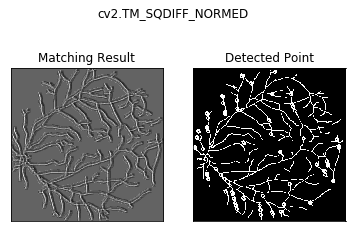

(212, 472) 224 484


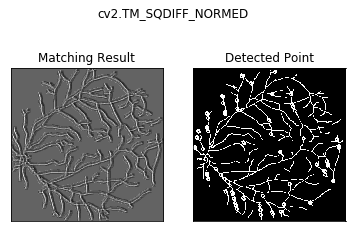

(278, 475) 290 487


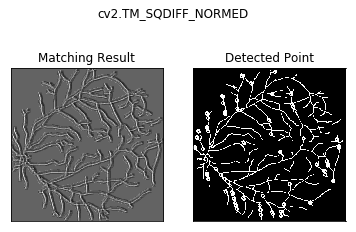

(278, 476) 290 488


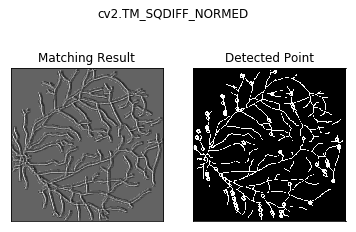

In [143]:
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# for meth in methods:
img = img2.copy()
method = eval(meth)
# Apply template Matching
res = cv2.matchTemplate(img2,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    x = int(pt[0] + w/2)
    y = int(pt[1] + h/2)
    cv2.circle(img, (x,y), 5, (255,255,255), 2)   
    print(pt, pt[0] + w, pt[1] + h)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    


# res = cv2.matchTemplate(img2,template,cv.TM_CCOEFF_NORMED)
# threshold = 0.8
# loc = np.where( res >= threshold)
# for pt in zip(*loc[::-1]):
#     cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)


In [148]:
plt.imsave('bif.png', img, cmap='gray')